# (1) Preparing the Data

In [69]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [70]:
# Import Data Files
path_mouse = os.path.join("Starter_code", "Pymaceuticals", "data", "Mouse_metadata.csv")
path_results = os.path.join("Starter_code", "Pymaceuticals", "data", "Study_results.csv")

mouse_df = pd.read_csv(path_mouse)
results_df = pd.read_csv(path_results)

In [71]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [72]:
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


### Merge Data Frames

In [73]:
complete_df = pd.merge(mouse_df, results_df, on = "Mouse ID", how = "outer")
len(complete_df["Mouse ID"].unique())   #Number of unique mice ID's


249

### Check for Duplicates

In [74]:
# Check for duplicates
complete_df["duplicates"]= complete_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)

duplicates_df = complete_df.loc[complete_df["duplicates"] == True, :]

duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicates
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


### Remove Duplicates

In [75]:
clean_df = complete_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], ignore_index="True") #Drop any rows that have the same Mouse ID and timepoint. 
#clean_df.loc[clean_df["Mouse ID"] == "g989", :]  to check

del clean_df["duplicates"]


### Display Updated Number of Unique Mice IDs

In [76]:
len(clean_df["Mouse ID"].unique())

# ??? Why Should the number of unique mouse id be different if you just removed duplicate data where the mouse id was the same? That doesn't make sense

249

# (2) Generate Summary Statistics

## Summary using Groupby

In [77]:
# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume
groupby_drug = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]   #Create Groupby object organized by Drug

sum_stats_df = pd.DataFrame({       #Make dataframe by using stats methods on the Groupby onject
    "Mean Tumor Volume" : groupby_drug.mean(),
"Median Tumor Volume" : groupby_drug.median(),
"Tumor Volume Variance" : groupby_drug.var(),
"Tumor Volume Std. Dev." : groupby_drug.std(),
"Tumor Volume Std. Err." : groupby_drug.sem()
})

sum_stats_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Using Agg Method

In [78]:
# Make a list of the drugs! 
drugs = [x for x in clean_df["Drug Regimen"].unique()]

In [79]:
drug_sum_list = []
for drug in drugs:
    drug_df = clean_df.loc[(clean_df["Drug Regimen"] == drug), "Tumor Volume (mm3)"]
    drug_sum_df = drug_df.agg(["mean", "median", "var", "std", "sem"], index = 0)
    drug_sum_list.append({
        "Mean Tumor Volume": drug_sum_df["mean"], 
        'Median Tumor Volume': drug_sum_df["median"], 
        'Tumor Volume Variance': drug_sum_df["var"],
        'Tumor Volume Std. Dev.': drug_sum_df["std"], 
        'Tumor Volume Std. Err': drug_sum_df["sem"]
        })
drug_sum_df_us = pd.DataFrame(drug_sum_list)
drug_sum_df_us.index = drugs
drug_sum_df_2 = drug_sum_df_us.sort_index()
drug_sum_df_2

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


# (3) Create Bar Charts and Pie Charts

## Bar Charts

### Bar Chart Using Pandas 

Text(0, 0.5, 'Number of Mice Tested')

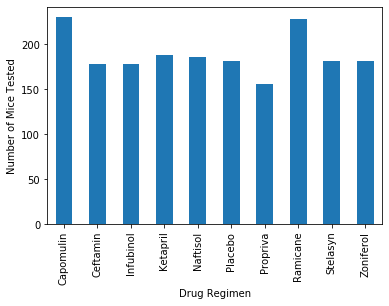

In [80]:
(clean_df.groupby("Drug Regimen")["Timepoint"].count()).plot(kind = "bar", figsize=(6,4))
plt.ylabel("Number of Mice Tested")


### Bar Chart Using pyplot

Text(0, 0.5, 'Number of Mice Tested')

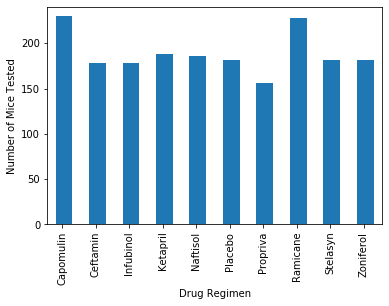

In [81]:
timepoint_col = clean_df.groupby("Drug Regimen")["Timepoint"].count()

# Set x axis and tick locations
x_axis = np.arange(len(timepoint_col.index))    #will get # of rows of df and use that for x-axis
tick_locations = [value+.2 for value in x_axis]    #will adjust tic marks so that they will be at the center of the bars


# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))  #Adjust for dimensions of figure (length by height)
plt.bar(x_axis, timepoint_col, align="edge", width = 0.5)  
plt.xticks(tick_locations, timepoint_col.index, rotation="vertical")   #Make labels vertical 

# Set x and y limits
plt.xlim(-0.25, len(timepoint_col.index)-0.25)
plt.ylim(0, max(timepoint_col)+10)

# Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


## Pie Charts

### Pie Chart using Pandas

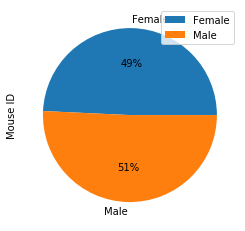

In [82]:
(clean_df.groupby("Sex")["Mouse ID"].count()).plot(kind="pie", autopct = '%1.0f%%')
plt.legend(loc = "best")


### Pie Chart using Pyplot

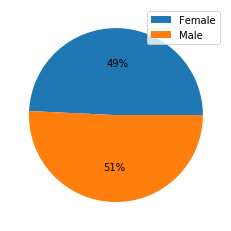

In [83]:
plt.pie(clean_df.groupby("Sex")["Mouse ID"].count(), autopct = "%1.0f%%")
labels = ["Female", "Male"]
plt.legend(labels, loc = "best")

# (4) Calculate Quartiles, Find Outliers, and Create a Box Plot

In [141]:
len(clean_df)

1888

## Quartiles

### Create Grouped DataFrame with the Last Timepoint for each mouse

In [137]:
max_timep_df = clean_df.groupby("Mouse ID")["Timepoint"].max()
len(max_timep_df)

249

In [142]:
"""Merge max timepoints with the cleaned dataframe. Need to merge so that only rows with the max timepoints are kept. Inner join"""
max_clean_df = pd.merge(max_timep_df, clean_df, on=["Mouse ID", "Timepoint"], how = "inner")

# Sort through the drug regimens and make a new smaller df with just the "best" regiments: Capomulin, Ramicane, Infubinol, and Ceftamin.
max_best_df = max_clean_df.loc[(max_clean_df["Drug Regimen"] == "Capomulin") | (max_clean_df["Drug Regimen"] == "Ramicane") | (max_clean_df["Drug Regimen"] == "Infubinol") | (max_clean_df["Drug Regimen"] == "Ceftamin"), :]
len(max_best_df)

100

### Create Lists to hold Data

In [143]:
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]    #List of the best treatment names
tumor_vol = [["Capomulin"], ["Ramicane"], ["Infubinol"], ["Ceftamin"]]  # Empty list to hold the tumor volumes



### Fill Tumor Volume List by Looping through the Merged DF

In [144]:
# Loop through the dataframe and fill in the tumor volume list based on the drug regimen
for x in max_best_df.index:
    
    if max_best_df["Drug Regimen"][x] == "Capomulin":   #If the drug is Capomulin, add the tumor volume to the first list subset 
        tumor_vol[0].append(max_best_df["Tumor Volume (mm3)"][x])

    elif max_best_df["Drug Regimen"][x] == "Ramicane":  #If the druf is Ramicane, add the tumor volume to the second list subset
        tumor_vol[1].append(max_best_df["Tumor Volume (mm3)"][x])

    elif max_best_df["Drug Regimen"][x] == "Infubinol":     # If the drug is Infubinol, add the tumor volume to the third list subset
        tumor_vol[2].append(max_best_df["Tumor Volume (mm3)"][x])
        
    else:   # The last drug is "Ceftamin" and add the corresponding volumes to the 4th and last list subset 
        tumor_vol[3].append(max_best_df["Tumor Volume (mm3)"][x])

In [145]:
# Remove placeholders in empty lists (The names of the drugs were the placeholders)
tumor_vol_f = [tumor_vol[i][1:] for i in range(len(tumor_vol))] 


### Find Outliers

In [146]:
# Capomulin Quartile Calculations
quartiles_cap = np.quantile(tumor_vol_f[0], [0.25, 0.5, 0.75])
lowerq_cap = quartiles_cap[0]
upperq_cap = quartiles_cap[2]
iqr_cap = upperq_cap - lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

outliers_cap = [vol for vol in tumor_vol_f[0] if (vol < lower_bound_cap or vol > upper_bound_cap)]
len(outliers_cap)

0

In [147]:
# Ramicane Quartile Calculations
quartiles_ram = np.quantile(tumor_vol_f[1], [0.25, 0.5, 0.75])
lowerq_ram = quartiles_ram[0]
upperq_ram = quartiles_ram[2]
iqr_ram = upperq_ram - lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

outliers_ram = [vol for vol in tumor_vol_f[1] if (vol < lower_bound_ram or vol > upper_bound_ram)]

In [148]:
# Infubinol Quartile Calculations
quartiles_in = np.quantile(tumor_vol_f[2], [0.25, 0.5, 0.75])
lowerq_in = quartiles_in[0]
upperq_in = quartiles_in[2]
iqr_in = upperq_in - lowerq_in
lower_bound_in = lowerq_in - (1.5*iqr_in)
upper_bound_in = upperq_in + (1.5*iqr_in)

outliers_in = [vol for vol in tumor_vol_f[2] if (vol < lower_bound_in or vol > upper_bound_in)]
print(lowerq_in)

54.04860769


In [149]:
# Ceftamin Quartile Calculations
quartiles_cef = np.quantile(tumor_vol_f[3], [0.25, 0.5, 0.75])
lowerq_cef = quartiles_cef[0]
upperq_cef = quartiles_cef[2]
iqr_cef = upperq_cef - lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

outliers_cef = [vol for vol in tumor_vol_f[3] if (vol < lower_bound_cef or vol > upper_bound_cef)]

In [150]:
print(
    f"Capomulin's potential outliers: {outliers_cap}. \n Ramicane's potential outliers: {outliers_ram}. \n Infubinol's potential outliers: {outliers_in}. \n Ceftamin's potential outliers: {outliers_cef}." 
)

Capomulin's potential outliers: []. 
 Ramicane's potential outliers: [] 
 Infubinol's potential outliers: [36.321345799999996] 
 Ceftamin's potential outliers: []


### Create Box Plot

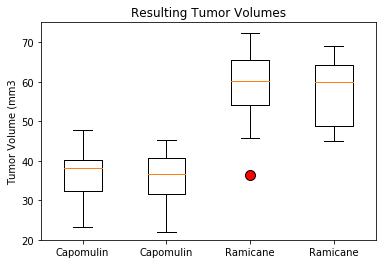

In [154]:
data = [tumor_vol_f[0], tumor_vol_f[1], tumor_vol_f[2], tumor_vol_f[3]]
fig1, ax1 = plt.subplots()
ax1.set_title('Resulting Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3')
ax1.boxplot(data, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})


# Set the axes ranges and axes labels
ax1.set_xlim(0.5, len(data) + 0.5)
top = 75
bottom = 20
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(np.repeat(treatment, 2))

plt.show()

# (5) Create a Line Plot and a Scatter Plot

# (6) Calculate Correlation and Regression